# Factoring RSA

Bloqs for breaking RSA cryptography systems via integer factorization.

RSA cryptography is a form of public key cryptography based on the difficulty of
factoring the product of two large prime numbers.

Using RSA, the cryptographic scheme chooses two large prime numbers p, q, their product n,
λ(n) = lcm(p - 1, q - 1) where λ is Carmichael's totient function, an integer e such that
1 < e < λ(n), and finally d as d ≡ e^-1 (mod λ(n)). The public key consists of the modulus n and
the public (or encryption) exponent e. The private key consists of the private (or decryption)
exponent d, which must be kept secret. p, q, and λ(n) must also be kept secret because they can be
used to calculate d.

Using Shor's algorithm for factoring, we can find p and q (the factors of n) in polynomial time
with a quantum algorithm.

References:
    [RSA (cryptosystem)](https://en.wikipedia.org/wiki/RSA_(cryptosystem)).

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ModExp`
Perform $b^e \mod{m}$ for constant `base` $b$, `mod` $m$, and quantum `exponent` $e$.

Modular exponentiation is the main computational primitive for quantum factoring algorithms.
We follow [GE2019]'s "reference implementation" for factoring. See `ModExp.make_for_shor`
to set the class attributes for a factoring run.

This bloq decomposes into controlled modular exponentiation for each exponent bit.

#### Parameters
 - `base`: The integer base of the exponentiation
 - `mod`: The integer modulus
 - `exp_bitsize`: The size of the `exponent` thru-register
 - `x_bitsize`: The size of the `x` right-register 

#### Registers
 - `exponent`: The exponent
 - `x [right]`: The output register containing the result of the exponentiation 

#### References
 - [How to factor 2048 bit RSA integers in 8 hours using 20 million noisy qubits](https://arxiv.org/abs/1905.09749). Gidney and Ekerå. 2019.


In [2]:
from qualtran.bloqs.factoring.rsa import ModExp

### Example Instances

In [3]:
g, N, n_e, n_x = sympy.symbols('g N n_e, n_x')
modexp_symb = ModExp(base=g, mod=N, exp_bitsize=n_e, x_bitsize=n_x)

In [4]:
modexp_small = ModExp(base=4, mod=15, exp_bitsize=3, x_bitsize=2048)

In [5]:
modexp = ModExp.make_for_shor(big_n=13 * 17, g=9)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([modexp_small, modexp, modexp_symb],
           ['`modexp_small`', '`modexp`', '`modexp_symb`'])

### Call Graph

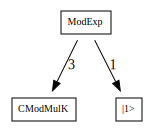

#### Counts totals:
 - `CModMulK`: 3
 - `|1>`: 1

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
modexp_small_g, modexp_small_sigma = modexp_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(modexp_small_g)
show_counts_sigma(modexp_small_sigma)

## `RSAPhaseEstimate`
Perform a single phase estimation of the decomposition of Modular Exponentiation for the
given base.

The constructor requires a pre-set base, see the make_for_shor factory method for picking a
random, valid base

#### Parameters
 - `n`: The bitsize of the modulus N.
 - `mod`: The modulus N; a part of the public key for RSA.
 - `base`: A base for modular exponentiation. 

#### References
 - [Circuit for Shor's algorithm using 2n+3 qubits](https://arxiv.org/abs/quant-ph/0205095). Beauregard. 2003. Fig 1.


In [8]:
from qualtran.bloqs.factoring.rsa import RSAPhaseEstimate

### Example Instances

In [9]:
n, p, g = sympy.symbols('n p g')
rsa_pe = RSAPhaseEstimate(n=n, mod=p, base=g)

In [10]:
rsa_pe_small = RSAPhaseEstimate.make_for_shor(big_n=13 * 17, g=9)

#### Graphical Signature

In [11]:
from qualtran.drawing import show_bloqs
show_bloqs([rsa_pe_small, rsa_pe],
           ['`rsa_pe_small`', '`rsa_pe`'])

### Call Graph

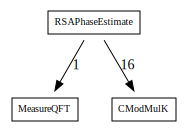

#### Counts totals:
 - `CModMulK`: 16
 - `MeasureQFT`: 1

In [12]:
from qualtran.resource_counting.generalizers import ignore_split_join
rsa_pe_small_g, rsa_pe_small_sigma = rsa_pe_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(rsa_pe_small_g)
show_counts_sigma(rsa_pe_small_sigma)

In [13]:
rsa_pe_shor = RSAPhaseEstimate.make_for_shor(big_n=13 * 17, g=9)